In [4]:
import pandas as pd
import pickle
from fbprophet import Prophet

In [34]:
with open('sj_df.pickle', 'rb') as read_file:
    big_sj_df = pickle.load(read_file)
    
with open('iq_df.pickle', 'rb') as read_file:
    big_iq_df = pickle.load(read_file)

In [11]:
big_sj_df.head()

,outbreak,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [47]:
big_sj_df.tail()

,outbreak,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
931,0,sj,2008,13,4,2008-03-25,0.07785,-0.039900,0.310471,0.296243,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,0,sj,2008,14,3,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,0,sj,2008,15,1,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,0,sj,2008,16,3,2008-04-15,0.00180,-0.031558,0.203900,0.209843,...,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,0,sj,2008,17,5,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,...,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [35]:
sj_ts = big_sj_df.iloc[:, 5]

In [36]:
sj_values = big_sj_df.iloc[:, 4]

In [37]:
sj_ts = sj_ts.to_frame().join(sj_values)

In [38]:
sj_ts = sj_ts.rename({'week_start_date': 'ds', 'total_cases': 'y'}, axis=1)

In [39]:
sj_ts.ds = pd.to_datetime(sj_ts.ds)

In [41]:
sj_ts.head()

,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6


In [42]:
model = Prophet()
model.fit(sj_ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = model.make_future_dataframe(periods=365, freq='W')

In [44]:
future.shape

(1301, 1)

In [46]:
future.tail()

,ds
1296,2015-03-22
1297,2015-03-29
1298,2015-04-05
1299,2015-04-12
1300,2015-04-19


In [48]:
forecast = model.predict(future)

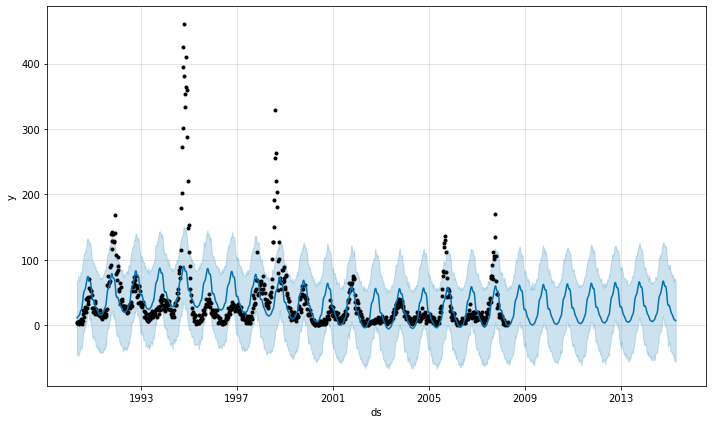

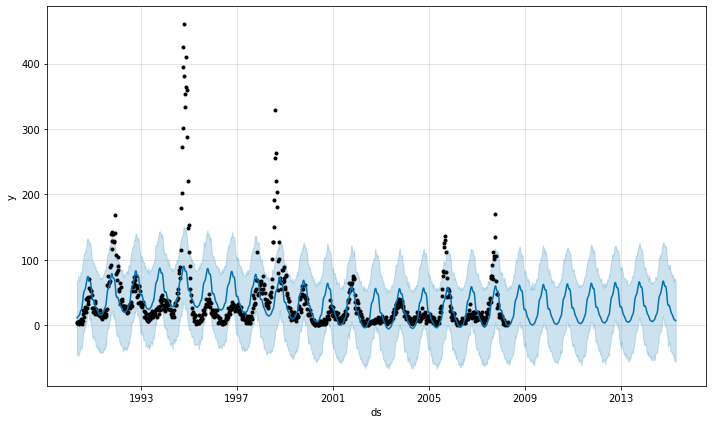

In [50]:
model.plot(forecast)

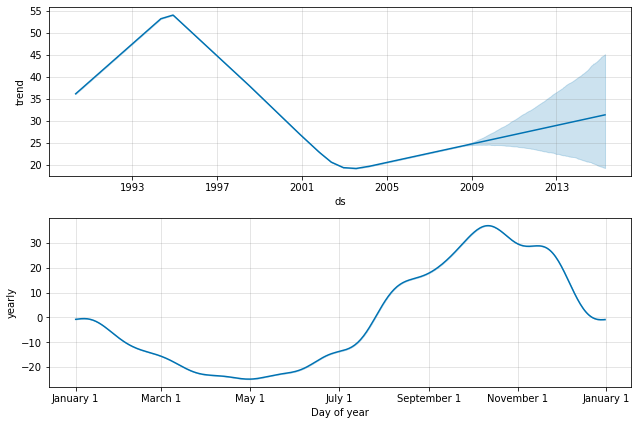

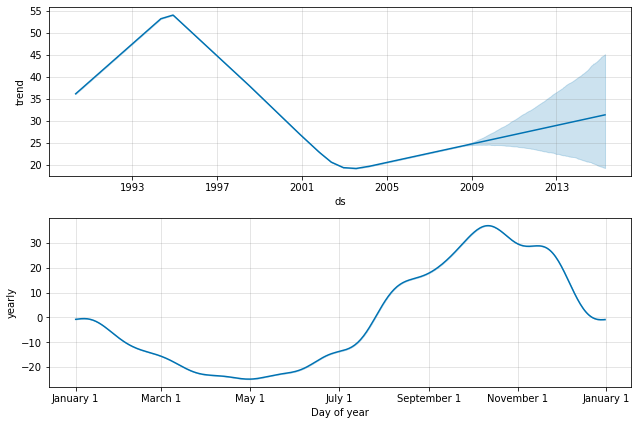

In [51]:
model.plot_components(forecast)